In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [152]:
df=pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [153]:
df.shape

(83439, 48)

### here we have so many columns, we will just work on important columns rather than all of them

In [154]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [155]:
# we will only put the useful ones in our dataset
df=df[["Country","EdLevel","YearsCodePro","Employment","DevType","ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df=df.rename({"DevType":"Devtype"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Devtype,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...","Developer, mobile",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,"Developer, front-end",NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",NaN


In [156]:
### to make the predictions, we only need the salaries, so we'll remove the none salaries
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Devtype,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...","Developer, mobile",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,Data scientist or machine learning specialist,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,"Developer, back-end",46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,"Developer, desktop or enterprise applications;...",77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,"Developer, full-stack",17748.0


In [157]:
print(df.shape)
df.info()

(46844, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Devtype       46751 non-null  object 
 5   Salary        46844 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.5+ MB


In [158]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Devtype         0
Salary          0
dtype: int64

#### we just need the full time developer and not the students or others, so we'll take into consideration only the full time guys and them remove the employement, since we don't need it anymore

In [159]:
df=df[df["Employment"]=="Employed full-time"]
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40187 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40187 non-null  object 
 1   EdLevel       40187 non-null  object 
 2   YearsCodePro  40187 non-null  object 
 3   Devtype       40187 non-null  object 
 4   Salary        40187 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


#### years of code in profession should be integer rather than object, so we'll see that

In [160]:
df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '1', '12', '8', '17', '14', '7', '26', '34', '11', '25',
       '24', '22', '13', '9', '20', '23', '39', '27', '35', '30', '19',
       '33', '37', '43', '40', '29', '38', '31', '45', '42', '28', '46',
       '32', '36', '47', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [161]:
# here we will replace less than 1 year and more than 50 year
def years(x):
    if x=="More than 50 years":
        return 50
    if x=="Less than 1 year":
        return 0.5
    return float(x)

df.YearsCodePro = df.YearsCodePro.apply(years)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40187 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40187 non-null  object 
 1   EdLevel       40187 non-null  object 
 2   YearsCodePro  40187 non-null  float64
 3   Devtype       40187 non-null  object 
 4   Salary        40187 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB


In [163]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

#### we will remove the unnecessary values and just remain with bachelor, master and less than bachelors

In [164]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)
df.EdLevel.unique()
    

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40187 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40187 non-null  object 
 1   EdLevel       40187 non-null  object 
 2   YearsCodePro  40187 non-null  float64
 3   Devtype       40187 non-null  object 
 4   Salary        40187 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB


In [166]:
df.Devtype.unique()

array(['Data scientist or machine learning specialist',
       'Developer, back-end',
       'Developer, desktop or enterprise applications;Developer, back-end',
       ...,
       'Data scientist or machine learning specialist;Developer, back-end;Academic researcher;Scientist;Student;Engineering manager',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Engineering manager;System administrator'],
      dtype=object)

so it is obvious tha developers have worked with many language and therefore we have a lot of unique values

In [167]:
df.Devtype.value_counts()

Developer, full-stack                                                                                                                                                                                              5734
Developer, back-end                                                                                                                                                                                                3788
Developer, front-end                                                                                                                                                                                               1573
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                                     1403
Developer, full-stack;Developer, back-end                                                                                               

we will take into account the full stack, front end, back end, mobile, data analyst.

In [168]:
def clean_devtype(x):
    if 'front-end' in x:
        return 'front-end developer'
    if 'back-end' in x:
        return 'back-end developer'
    if 'mobile' in x:
        return 'mobile developer'
    if 'academic' in x:
        return 'academic researcher'
    if 'game' in x:
        return 'game developer'
    if 'data' in x:
        return 'data scientist'
    if 'full-stack' in x:
        return 'full-stack developer'

df['Devtype'] = df['Devtype'].apply(clean_devtype)
df.Devtype.unique()

array([None, 'back-end developer', 'full-stack developer',
       'front-end developer', 'data scientist', 'game developer',
       'mobile developer'], dtype=object)

In [169]:
df.Devtype.value_counts()

back-end developer      11399
front-end developer     10829
full-stack developer     8526
mobile developer         2142
data scientist           1054
game developer            314
Name: Devtype, dtype: int64

In [170]:
df.head()

,Country,EdLevel,YearsCodePro,Devtype,Salary
9,Sweden,Master’s degree,4.0,None,51552.0
11,Spain,Bachelor’s degree,5.0,back-end developer,46482.0
12,Germany,Master’s degree,6.0,back-end developer,77290.0
16,Turkey,Bachelor’s degree,2.0,full-stack developer,17748.0
17,Canada,Bachelor’s degree,6.0,front-end developer,46135.0


In [171]:
df.Country.value_counts()

United States of America                                9169
India                                                   3383
Germany                                                 2749
United Kingdom of Great Britain and Northern Ireland    2603
Canada                                                  1552
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

### we don't need the countries having very less amount of developers, so that our model doesn't get confused

In [172]:
def remove_countries(counts,bar):
    counts_map={}
    for i in range(len(counts)):
        if counts.values[i]>=bar:
            counts_map[counts.index[i]]=counts.index[i]
        else:
            counts_map[counts.index[i]]="other"
    return counts_map

In [173]:
country_map = remove_countries(df.Country.value_counts(),300)
df.Country = df.Country.map(country_map)
print(df.Country.value_counts())
sum(df.Country.value_counts())

United States of America                                9169
other                                                   7332
India                                                   3383
Germany                                                 2749
United Kingdom of Great Britain and Northern Ireland    2603
Canada                                                  1552
France                                                  1396
Brazil                                                  1340
Spain                                                    890
Netherlands                                              835
Australia                                                824
Poland                                                   773
Italy                                                    756
Russian Federation                                       741
Sweden                                                   735
Turkey                                                   458
Switzerland             

40187

In [174]:
median_salaries=df.groupby("Country").agg({"Salary":"median"})
max_salaries=df.groupby("Country").agg({"Salary":"max"})
print(median_salaries)
print("max",max_salaries)

                                                      Salary
Country                                                     
Argentina                                            36674.0
Australia                                            80172.0
Austria                                              57182.0
Belgium                                              45396.0
Brazil                                               22536.0
Canada                                               75631.0
Denmark                                              83364.0
Finland                                              61746.0
France                                               48644.0
Germany                                              64859.0
India                                                15084.0
Iran, Islamic Republic of...                         25656.0
Israel                                              108564.0
Italy                                                35672.0
Mexico                  

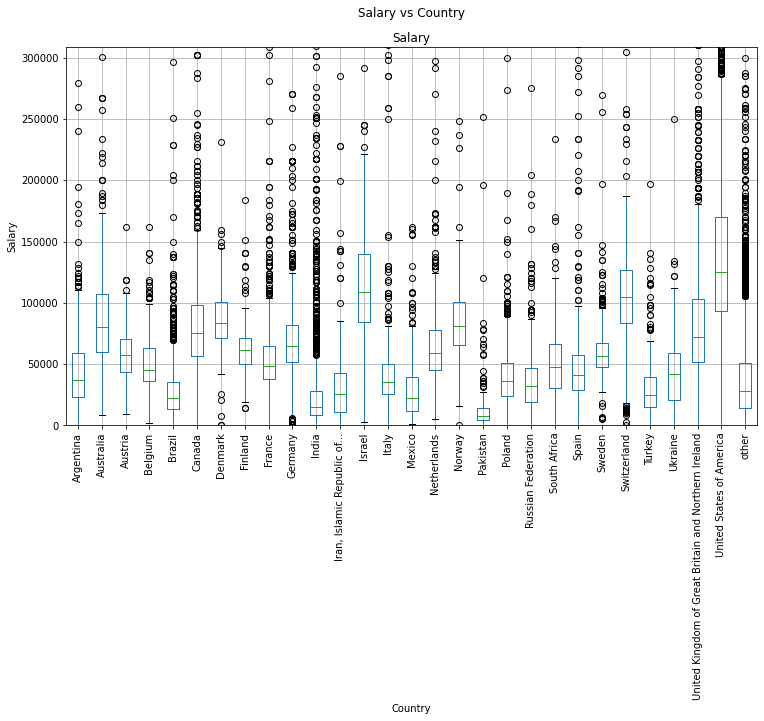

In [175]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary",'Country',ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.ylim(0,308520)
plt.show()

### we can see that we have a lot of outlier here, after changing the limits of salary various times, we arrive to the decision that to remove the outlier, we will limit our salaries, but its should still contain some higher and lower values, therefore max will be 250000 and lowest would be 10000, we will remove the other values

In [176]:
df=df[df.Salary<=250000]
df=df[df.Salary>=10000]
df=df[df["Country"]!="Other"]
df.head(15)

,Country,EdLevel,YearsCodePro,Devtype,Salary
9,Sweden,Master’s degree,4.0,None,51552.0
11,Spain,Bachelor’s degree,5.0,back-end developer,46482.0
12,Germany,Master’s degree,6.0,back-end developer,77290.0
16,Turkey,Bachelor’s degree,2.0,full-stack developer,17748.0
17,Canada,Bachelor’s degree,6.0,front-end developer,46135.0
23,France,Master’s degree,2.0,data scientist,38915.0
24,Germany,Master’s degree,18.0,front-end developer,77831.0
26,Switzerland,Master’s degree,5.0,None,81319.0
27,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,21.0,back-end developer,68507.0
29,Russian Federation,Master’s degree,16.0,back-end developer,37752.0


In [177]:
median_salaries=df.groupby("Country").agg({"Salary":"median"})
max_salaries=df.groupby("Country").agg({"Salary":"max"})
print(median_salaries)
print("max",max_salaries)

                                                      Salary
Country                                                     
Argentina                                            38322.0
Australia                                            76831.0
Austria                                              57072.0
Belgium                                              45396.0
Brazil                                               26526.0
Canada                                               72606.0
Denmark                                              83364.0
Finland                                              60972.0
France                                               46704.0
Germany                                              64859.0
India                                                21361.0
Iran, Islamic Republic of...                         31356.0
Israel                                              108564.0
Italy                                                34591.0
Mexico                  

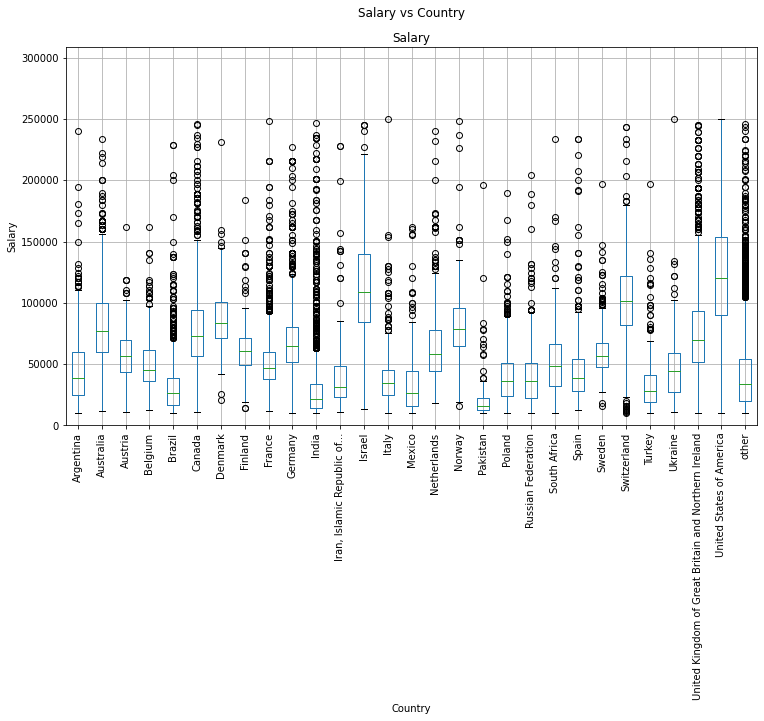

In [178]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary",'Country',ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.ylim(0,308520)
plt.show()

In [179]:
print(df.Country)

9                          Sweden
11                          Spain
12                        Germany
16                         Turkey
17                         Canada
                   ...           
83430    United States of America
83432                      Canada
83434    United States of America
83436    United States of America
83438                      Brazil
Name: Country, Length: 35167, dtype: object


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35167 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       35167 non-null  object 
 1   EdLevel       35167 non-null  object 
 2   YearsCodePro  35167 non-null  float64
 3   Devtype       29909 non-null  object 
 4   Salary        35167 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.6+ MB


In [181]:
df.head(15)

,Country,EdLevel,YearsCodePro,Devtype,Salary
9,Sweden,Master’s degree,4.0,None,51552.0
11,Spain,Bachelor’s degree,5.0,back-end developer,46482.0
12,Germany,Master’s degree,6.0,back-end developer,77290.0
16,Turkey,Bachelor’s degree,2.0,full-stack developer,17748.0
17,Canada,Bachelor’s degree,6.0,front-end developer,46135.0
23,France,Master’s degree,2.0,data scientist,38915.0
24,Germany,Master’s degree,18.0,front-end developer,77831.0
26,Switzerland,Master’s degree,5.0,None,81319.0
27,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,21.0,back-end developer,68507.0
29,Russian Federation,Master’s degree,16.0,back-end developer,37752.0


### Cleaning of data is done, but since we have string values, which our model will not understand, so we'll transform it

In [182]:
df.EdLevel.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [183]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
df.EdLevel=le_edu.fit_transform(df.EdLevel)
df.EdLevel.unique()


array([2, 0, 1, 3])

In [184]:
le_country=LabelEncoder()
df.Country = le_country.fit_transform(df.Country)
df.Country.unique()

array([22, 21,  9, 24,  5,  8, 23, 26, 19, 12, 25, 27,  4, 28, 13, 15, 18,
        2,  1,  3, 11, 10,  6,  7,  0, 20, 17, 16, 14])

In [185]:
le_dev=LabelEncoder()
df.Devtype=le_dev.fit_transform(df.Devtype)
df.Devtype.unique()

array([6, 0, 3, 2, 1, 4, 5])

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35167 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       35167 non-null  int32  
 1   EdLevel       35167 non-null  int32  
 2   YearsCodePro  35167 non-null  float64
 3   Devtype       35167 non-null  int32  
 4   Salary        35167 non-null  float64
dtypes: float64(2), int32(3)
memory usage: 1.2 MB


### Now will create our model

In [187]:
X=df.drop("Salary",axis=1)
y=df.Salary

In [194]:
X.head()

,Country,EdLevel,YearsCodePro,Devtype
9,22,2,4.0,6
11,21,0,5.0,0
12,9,2,6.0,0
16,24,0,2.0,3
17,5,0,6.0,2


In [193]:
y.head()

9     51552.0
11    46482.0
12    77290.0
16    17748.0
17    46135.0
Name: Salary, dtype: float64

### using linear regression

In [198]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y.values)

LinearRegression()

In [199]:
y_pred=lr.predict(X)

In [200]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
error=np.sqrt(mean_squared_error(y,y_pred))
error

44035.000324853405

the error is too high here, so we'll try a different model

### Using DecisionTreeRegressor

In [201]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [202]:
y_pred=dtr.predict(X)

In [203]:
error=np.sqrt(mean_squared_error(y,y_pred))
error

26963.13126461602

### Using RandomForestRegressor

In [204]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [205]:
y_pred = rfr.predict(X)

In [206]:
error=np.sqrt(mean_squared_error(y,y_pred))
error

27292.812864555683

### Using grid search to find the best model

In [207]:
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [208]:
regressor=gs.best_estimator_
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
error

31128.610701331247

### Implementing XGBoost

In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor

In [210]:
xgb = XGBRegressor()
xgb.fit(X,y.values)
y_pred=xgb.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
error

29285.348949161387

### implementing light boost

In [211]:
import lightgbm as lgb
d_train = lgb.Dataset(X,label=y.values)
params={}
params['learning_rate']=0.003
params['boosting_type']='gbdt'
clf=lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 35167, number of used features: 4
[LightGBM] [Info] Start training from score 71280.813291


In [212]:
y_pred=clf.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
error

42278.6891221509

In [213]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [214]:
model=Sequential()
n_cols=df.shape[1]

In [215]:
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation='linear'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X,y.values,epochs=5)

Epoch 1/5
1099/1099 [==============================] - 2s 857us/step - loss: 4582301184.00000s
Epoch 2/5
1099/1099 [==============================] - 1s 929us/step - loss: 2027678464.00000s - loss: 2029559040.00
Epoch 3/5
1099/1099 [==============================] - 1s 919us/step - loss: 2017017344.00000s - loss: 20189
Epoch 4/5
1099/1099 [==============================] - 1s 840us/step - loss: 2011467648.0000
Epoch 5/5
1099/1099 [==============================] - 1s 788us/step - loss: 2007620992.0000


In [216]:
y_pred=model.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
error

44773.12802631302

### so even deep learning is not doing that well on this dataset and giving us the error, we will move forward with XGBoost algorithm

In [217]:
X

,Country,EdLevel,YearsCodePro,Devtype
9,22,2,4.0,6
11,21,0,5.0,0
12,9,2,6.0,0
16,24,0,2.0,3
17,5,0,6.0,2
...,...,...,...,...
83430,27,2,21.0,2
83432,5,0,0.5,0
83434,27,0,5.0,0
83436,27,1,4.0,6


In [218]:
y.head()

9     51552.0
11    46482.0
12    77290.0
16    17748.0
17    46135.0
Name: Salary, dtype: float64

In [219]:
X = np.array([["United States of America", 'Master’s degree', 15,"full-stack developer" ]])
X

array([['United States of America', 'Master’s degree', '15',
        'full-stack developer']], dtype='<U24')

In [220]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_edu.transform(X[:,1])
X[:, 3] = le_dev.transform(X[:,3])
X = X.astype(float)
X

array([[27.,  2., 15.,  3.]])

In [221]:
y_pred=xgb.predict(X)
y_pred

array([144778.64], dtype=float32)

### Saving the model

In [222]:
import pickle

In [223]:
data={"model":xgb,"le_country":le_country,"le_edu":le_edu,"le_dev":le_dev}
with open('steps1.pkl','wb') as file:
    pickle.dump(data,file)

In [224]:
with open('steps1.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_edu = data["le_edu"]
le_dev = data["le_dev"]

In [225]:
y_pred=regressor_loaded.predict(X)
y_pred

array([144778.64], dtype=float32)

In [226]:
print(df.Country)

9        22
11       21
12        9
16       24
17        5
         ..
83430    27
83432     5
83434    27
83436    27
83438     4
Name: Country, Length: 35167, dtype: int32
